In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer



In [90]:
data.head()

,Unnamed: 0,SHORT_TEXT,D_day_of_week,COUNTRY,MATERIAL_ID,IS_HOLIDAY,Mean_Delay_Material,Median_Delay_Material,quarter,month,...,INBOUND_DELIVERY_ITEM_ID,REQUESTED_DELIVERY_DATE,PLANT_ID,SUB_COMMODITY_DESC,COMPANY_CODE_ID,CREATE_DATE,Time_Difference,REQUESTED_DELIVERY_DATE_year,REQUESTED_DELIVERY_DATE_month,REQUESTED_DELIVERY_DATE_day
0,0,"1/2"" OD x 0.063"" Wall 20' Long ASTM A51",5.0,CA,NaN,0,NaN,NaN,3,7,...,0.0,2021-08-06,4036.0,29,0,2021-07-26,6.0,2021.0,8.0,6.0
1,1,994 45 9951A TU E 4.99-8.62 3X0X 4014,5.0,US,2.100008e+09,0,18.307692,3.0,3,7,...,10.0,2021-09-10,4016.0,12,20,2021-07-26,4.0,2021.0,9.0,10.0
2,2,"5/8"" x 50 ft Black Rubber ProFitter[REG]",5.0,CA,NaN,0,NaN,NaN,3,7,...,0.0,2021-08-27,4036.0,41,0,2021-07-26,-24.0,2021.0,8.0,27.0
3,3,4XL - HI-VIZ SAFETY LONG-SLEEVED SHIRT -,4.0,CA,NaN,0,NaN,NaN,3,7,...,0.0,2021-08-05,4036.0,35,0,2021-07-26,-6.0,2021.0,8.0,5.0
4,4,N66 2 BT 00WUD BN PL 65 1.5% 0,2.0,CA,2.100022e+09,0,0.000000,0.0,3,7,...,10.0,2021-07-27,4007.0,62,0,2021-07-26,7.0,2021.0,7.0,27.0


In [10]:

data = pd.read_csv('all_koch2.csv')
data[data['DELIVERY_DATE'] >= data['CREATE_DATE']]

data['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(data['REQUESTED_DELIVERY_DATE'])


data.columns

Index(['Unnamed: 0', 'DELIVERY_DATE', 'SHORT_TEXT', 'D_day_of_week', 'COUNTRY',
       'MATERIAL_ID', 'IS_HOLIDAY', 'Mean_Delay_Material',
       'Median_Delay_Material', 'quarter', 'month', 'day_of_week', 'Ranking',
       'Category_total_counts', 'PLANNED_DELIVERY_DAYS',
       'INBOUND_DELIVERY_ITEM_ID', 'REQUESTED_DELIVERY_DATE', 'PLANT_ID',
       'SUB_COMMODITY_DESC', 'COMPANY_CODE_ID', 'CREATE_DATE',
       'Time_Difference'],
      dtype='object')

In [11]:


data['REQUESTED_DELIVERY_DATE_year'] = data['REQUESTED_DELIVERY_DATE'].dt.year
data['REQUESTED_DELIVERY_DATE_month'] = data['REQUESTED_DELIVERY_DATE'].dt.month
data['REQUESTED_DELIVERY_DATE_day'] = data['REQUESTED_DELIVERY_DATE'].dt.day

data['REQUESTED_DELIVERY_DATE_month_sin'] = np.sin((data['REQUESTED_DELIVERY_DATE_month'] - 1) * (2. * np.pi / 12))
data['REQUESTED_DELIVERY_DATE_month_cos'] = np.cos((data['REQUESTED_DELIVERY_DATE_month'] - 1) * (2. * np.pi / 12))

data['REQUESTED_DELIVERY_DATE_day_sin'] = np.sin((data['REQUESTED_DELIVERY_DATE_day'] - 1) * (2. * np.pi / 12))
data['REQUESTED_DELIVERY_DATE_day_cos'] = np.cos((data['REQUESTED_DELIVERY_DATE_day'] - 1) * (2. * np.pi / 12))

data['REQUESTED_DELIVERY_DATE_year_sin'] = np.sin((data['REQUESTED_DELIVERY_DATE_year'] - 1) * (2. * np.pi / 12))
data['REQUESTED_DELIVERY_DATE_year_cos'] = np.cos((data['REQUESTED_DELIVERY_DATE_year'] - 1) * (2. * np.pi / 12))




In [4]:
import pandas as pd
import re

# Assuming df is your DataFrame and "SHORT_TEXT" is the column containing product descriptions
product_descriptions = []

# Define regular expression pattern to extract product descriptions
pattern = r'[a-zA-Z0-9\s-]+'

# Loop through each row in the "SHORT_TEXT" column
for text in data["SHORT_TEXT"]:
    # Check if the text is not None (i.e., not missing)
    if pd.notna(text):
        # Find all matches of the pattern in the text
        matches = re.findall(pattern, text)
        # Join the matches into a single string and append to the list of product descriptions
        product_description = ' '.join(matches)
        product_descriptions.append(product_description)
    else:
        # If the text is missing, append an empty string
        product_descriptions.append("")

# Add the extracted product descriptions to the DataFrame as a new column
data["PRODUCT_DESCRIPTION"] = product_descriptions

In [5]:

# Define the TF-IDF vectorizer with stop words removal
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Define the dimensionality reduction technique (Truncated SVD)
lsa = TruncatedSVD(n_components=5)

# Create a pipeline combining TF-IDF and Truncated SVD
pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('lsa', lsa)
])

# Fit and transform the data
tfidf_lsa_features = pipeline.fit_transform(data["PRODUCT_DESCRIPTION"])

# Convert the transformed data to a DataFrame
tfidf_lsa_df = pd.DataFrame(tfidf_lsa_features)

data = pd.concat([data, tfidf_lsa_df], axis=1)

In [5]:
pd.set_option('display.max_columns', None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959086 entries, 0 to 959085
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         959086 non-null  int64  
 1   SHORT_TEXT                         959084 non-null  object 
 2   D_day_of_week                      959086 non-null  float64
 3   COUNTRY                            959086 non-null  object 
 4   MATERIAL_ID                        521704 non-null  float64
 5   IS_HOLIDAY                         959086 non-null  int64  
 6   Mean_Delay_Material                521704 non-null  float64
 7   Median_Delay_Material              521704 non-null  float64
 8   quarter                            959086 non-null  int64  
 9   month                              959086 non-null  int64  
 10  day_of_week                        959086 non-null  int64  
 11  Ranking                            9588

In [7]:
# # Assuming df_combined is your DataFrame with the TF-IDF and LSA features
# data.rename(columns={0: 'v_0', 1: 'v_1', 2: 'v_2', 3: 'v_3', 4: 'v_4', 5: 'v_5'}, inplace=True)
# # Rename duplicate columns


In [13]:
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer

# # Assuming the features to use for prediction (excluding date features for simplicity)
# features = ['D_day_of_week', 'COUNTRY', 'IS_HOLIDAY', 'Mean_Delay_Material', 'Median_Delay_Material',
#             'quarter', 'month','SUB_COMMODITY_DESC', 'COMPANY_CODE_ID', 'REQUESTED_DELIVERY_DATE_month', 'CREATE_DATE', 
#             'PLANNED_DELIVERY_DAYS', 'REQUESTED_DELIVERY_DATE_year', 'REQUESTED_DELIVERY_DATE_day','REQUESTED_DELIVERY_DATE_year_cos','REQUESTED_DELIVERY_DATE_year_sin',
#             'REQUESTED_DELIVERY_DATE_day_cos','REQUESTED_DELIVERY_DATE_day_sin','REQUESTED_DELIVERY_DATE_month_cos','REQUESTED_DELIVERY_DATE_month_sin']
# target = 'Time_Difference'

# # Handling categorical and numerical columns separately
# categorical_features = ['COUNTRY','REQUESTED_DELIVERY_DATE_year', 'REQUESTED_DELIVERY_DATE_day','IS_HOLIDAY' ,'SUB_COMMODITY_DESC', 'COMPANY_CODE_ID', 'D_day_of_week', 'CREATE_DATE']
# numerical_features = list(set(features) - set(categorical_features))

# # Defining preprocessing for numerical and categorical data
# numerical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())])

# python
# Copy code
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Assuming the features to use for prediction (excluding date features for simplicity)
features = ['COUNTRY', 'Mean_Delay_Material',
            'quarter', 'month', 'INBOUND_DELIVERY_ITEM_ID', 'SUB_COMMODITY_DESC', 'COMPANY_CODE_ID', 'PLANNED_DELIVERY_DAYS','REQUESTED_DELIVERY_DATE_day_cos', 'REQUESTED_DELIVERY_DATE_day_sin','REQUESTED_DELIVERY_DATE_month_cos', 'REQUESTED_DELIVERY_DATE_month_sin',
            'REQUESTED_DELIVERY_DATE_year_cos','REQUESTED_DELIVERY_DATE_year_sin']
target = 'Time_Difference'

# Handling categorical and numerical columns separately
categorical_features = ['COUNTRY', 'SUB_COMMODITY_DESC', 'COMPANY_CODE_ID']
numerical_features = list(set(features) - set(categorical_features))

# Defining preprocessing for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

X = data[features]
y = data[target]

# Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Checking the shape of the processed data
X_train_preprocessed.shape, X_test_preprocessed.shape


((767268, 120), (191818, 120))

In [14]:
X_train_preprocessed = X_train_preprocessed.toarray()
X_test_preprocessed = X_test_preprocessed.toarray()

# Now you can reshape
X_train_preprocessed = X_train_preprocessed.reshape((X_train_preprocessed.shape[0], 1, X_train_preprocessed.shape[1]))
X_test_preprocessed = X_test_preprocessed.reshape((X_test_preprocessed.shape[0], 1, X_test_preprocessed.shape[1]))


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    # First LSTM layer with return_sequences=True to stack another LSTM layer on top
    LSTM(50, activation='relu', input_shape=(1, 120), return_sequences=True),
    Dropout(0.2),  # Dropout for regularization
    
    # Second LSTM layer
    LSTM(100, activation='relu', return_sequences=False),  # Increased number of units
    Dropout(0.2),  # Dropout for regularization
    
    # Additional Dense layer (optional) to increase model capacity
    Dense(50, activation='relu'),
    Dropout(0.2),  # Dropout for regularization
    
    # Output layer
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary to see the structure and number of parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             34200     
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               60400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 50)                5050      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 5

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    verbose=1,           # Log when training is stopped
    restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored quantity

# Define the model checkpoint callback
model_checkpoint = ModelCheckpoint(
    filepath='best_model.h5',  # Path where to save the model
    monitor='val_loss',        # Monitor the validation loss
    save_best_only=True,       # Only save the model if it's the best on the validation dataset
    verbose=1)                 # Log when a new best model is saved

# Add the callbacks to the training process
history = model.fit(
    X_train_preprocessed,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint])  # Include the callbacks here


Epoch 1/10
19161/19182 [============================>.] - ETA: 0s - loss: 1708.1112
Epoch 1: val_loss improved from inf to 1928.62317, saving model to best_model.h5
19182/19182 [==============================] - 38s 2ms/step - loss: 1707.5211 - val_loss: 1928.6232
Epoch 2/10
   94/19182 [..............................] - ETA: 31s - loss: 1655.4587

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19166/19182 [============================>.] - ETA: 0s - loss: 1597.3640
Epoch 2: val_loss improved from 1928.62317 to 1855.70947, saving model to best_model.h5
19182/19182 [==============================] - 34s 2ms/step - loss: 1597.1083 - val_loss: 1855.7095
Epoch 3/10
19162/19182 [============================>.] - ETA: 0s - loss: 1562.3468
Epoch 3: val_loss improved from 1855.70947 to 1821.40833, saving model to best_model.h5
19182/19182 [==============================] - 34s 2ms/step - loss: 1561.2051 - val_loss: 1821.4083
Epoch 4/10
19182/19182 [==============================] - ETA: 0s - loss: 1527.9666
Epoch 4: val_loss improved from 1821.40833 to 1793.53418, saving model to best_model.h5
19182/19182 [==============================] - 34s 2ms/step - loss: 1527.9666 - val_loss: 1793.5342
Epoch 5/10
19167/19182 [============================>.] - ETA: 0s - loss: 1510.5350
Epoch 5: val_loss improved from 1793.53418 to 1775.96326, saving model to best_model.h5
19182/19182 [==========

In [18]:
test_loss = model.evaluate(X_test_preprocessed, y_test)

5995/5995 [==============================] - 3s 565us/step - loss: 1292.4191


In [19]:
predictions = model.predict(X_test_preprocessed)

5995/5995 [==============================] - 3s 550us/step


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

# Assuming y_test contains the actual target values
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score: {r2}")


Mean Absolute Error (MAE): 12.62325938163856
Mean Squared Error (MSE): 1292.416273351273
R-squared Score: 0.22718908483069733


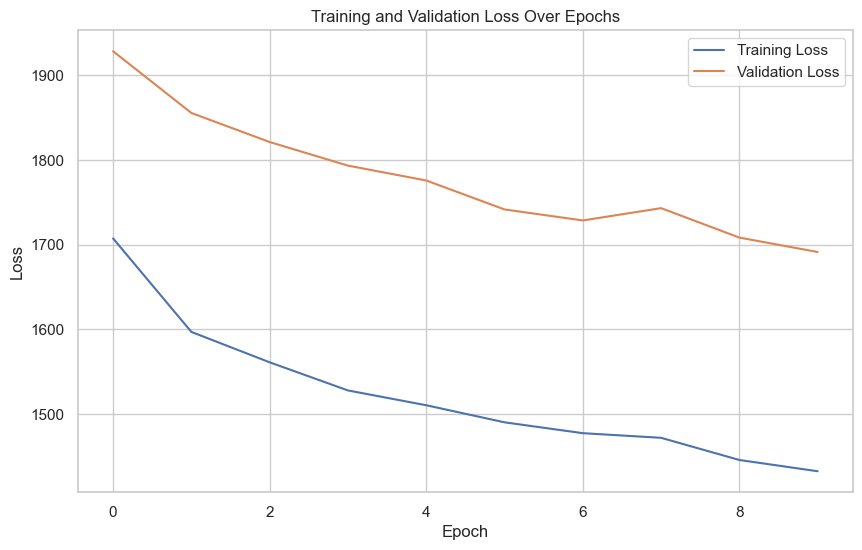

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plotting Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [7]:
from tensorflow.keras.models import load_model

# Load the entire model from the .h5 file
model_base = load_model('/Users/addisonjpratt/sfguide-intro-to-machine-learning-with-snowpark-ml-for-python/best_model (3).h5')

In [16]:
test_loss = model_base.evaluate(X_test_preprocessed, y_test)

ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1917, in test_step
        y_pred = self(x, training=False)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_12" is incompatible with the layer: expected shape=(None, 1, 255), found shape=(None, 1, 120)


In [ ]:
from tensorflow.keras.models import model_from_json

model_json = model.to_json()
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)
# Load model architecture from JSON file
with open('/Users/addisonjpratt/Documents/model_architecture.json', 'r') as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)

# Load weights into the new model
loaded_model.load_weights("model_weights(3).h5")

In [ ]:
Mean Absolute Error (MAE): 12.446554899726546
Mean Squared Error (MSE): 1178.0400238236136
R-squared Score: 0.295581301714428